##Flight Price Prediction


Problem Statement

Flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, duration of flights, various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help people save money and time. I have proposed a predictive model that uses regression based Machine Learning algorithms on the collected historical data of flights.Here prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities are taken.

Link of the dataset:- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

Use cases

1.Prediction result can be useful for travellers to make informed decisions about their travel.

2.On the other hand, airlines can make use of this technology to forecast rates of competitors and adjust their pricing strategies accordingly to find out the optimal price they should set to maximize revenue while remaining competitive. 

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Train set
------

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/flight/FarePrediction.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#Exploratory Data Analysis

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#Data Visualization

Bar chart showing top most preferred Airlines 

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

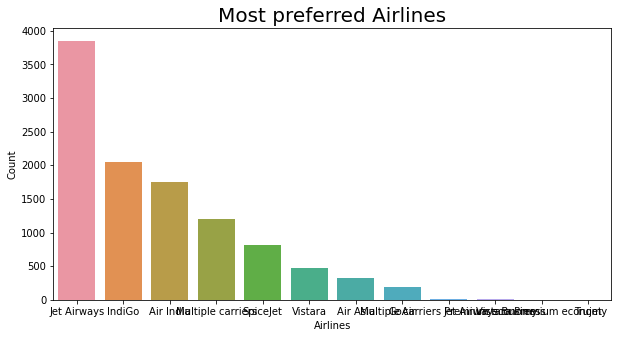

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Airline", data=df,order=df['Airline'].value_counts().index)
plt.title("Most preferred Airlines",size=20,color='black')
plt.ylabel("Count",size=10,color='black')
plt.xlabel("Airlines",size=10,color='black')
plt.show()

Insights

1.Most preferred Airline is "Jet Airways"

2.Of all the total flight tickets sold, Jet Airways has the highest share followed by Indigo .

In [ ]:
#Airlines Vs Flight ticket Price

airlines_price=df.groupby('Airline') ['Price'].max().sort_values(ascending=False)[0:10].to_frame()

airlines_price

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


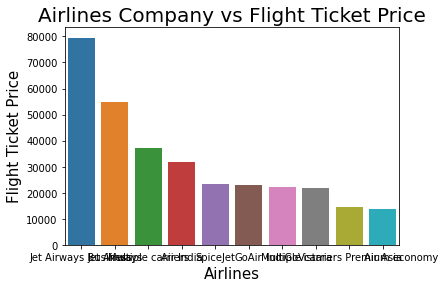

In [ ]:
plt.figsize=(10,5)
sns.barplot(x=airlines_price.index, y=airlines_price["Price"])
plt.title("Airlines Company vs Flight Ticket Price",size=20,color='black')
plt.ylabel("Flight Ticket Price",size=15,color='black')
plt.xlabel("Airlines",size=15,color='black')
plt.show()

Insights

"Jet Airways Business" tickets are the most expensive ones

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

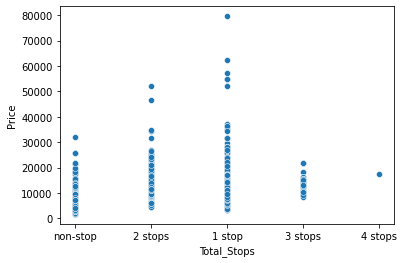

In [ ]:
sns.scatterplot(x = 'Total_Stops' , y = 'Price' , data = df) 

Insights

One Stop Tickets are costly.


Text(0, 0.5, 'COUNT')

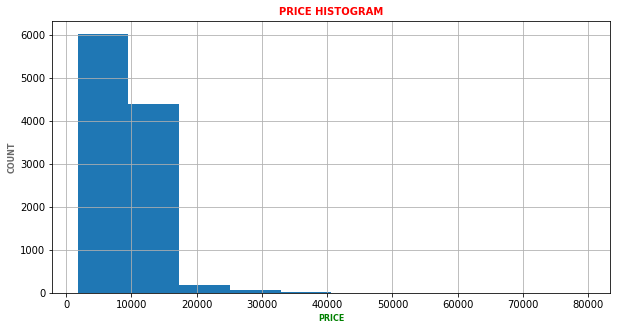

In [ ]:
# Histogram graph
plt.figure(figsize = (10,5))
df['Price'].hist()
plt.title('PRICE HISTOGRAM', fontsize = 10, color ='red', fontweight = 'bold')
plt.xlabel('PRICE', color = 'green',fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey',fontweight = 'bold', fontsize = 8)

Insights

Most tickets are sold in the price range of 10000-20000


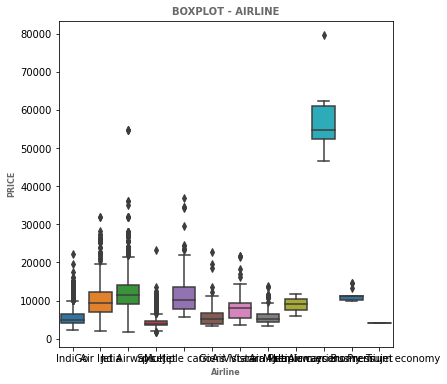

In [ ]:
# Boxplot

plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='Airline', y='Price', palette = 'tab10')
plt.title('BOXPLOT - AIRLINE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('Airline', color = 'dimgrey',fontweight = 'bold', fontsize = 8)
plt.ylabel('PRICE', color = 'dimgrey',fontweight = 'bold', fontsize = 8)
plt.show();

#Data Cleaning

In [ ]:
df['Total_Stops'].fillna(df['Total_Stops'].mode() [0],inplace=True)
df.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#Source 	Destination
df.drop('Route',axis=1,inplace=True)

#Additional_Info' column can be dropped since more than 70% of them have no information.
df.drop('Additional_Info',axis=1,inplace=True)

In [ ]:
# Checking if there are any Duplicate values
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,14:35,04:25 02 Jun,13h 50m,2 stops,13376
1061,Air India,21/05/2019,Delhi,Cochin,22:00,19:15 22 May,21h 15m,2 stops,10231
1348,Air India,18/05/2019,Delhi,Cochin,17:15,19:15 19 May,26h,2 stops,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,05:30,04:25 07 Jun,22h 55m,2 stops,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,18:25,21:20,2h 55m,non-stop,7303
...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,23:05,12:35 28 Jun,13h 30m,2 stops,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,09:40,12:35 02 Jun,26h 55m,2 stops,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,09:40,12:35 07 Jun,26h 55m,2 stops,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,23:05,19:00 28 Jun,19h 55m,2 stops,11150


In [ ]:
df.duplicated().sum()

220

In [ ]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

#Converting into Datetime:

1) We are going to extract the date and month from the date of the journey .

2) For this, we require pandas to_datetime to convert the object data type to DateTime data type .

3) .dt.day the method will extract only the day from the date.

4) .dt.month the method will extract only the month of that date.

5) .dt.year the method will extract only the year of that date.

In [ ]:
# Date_of_Journey
df["Date_of_Journey"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y")
df['date']=df['Date_of_Journey'].dt.day
df['month']=df['Date_of_Journey'].dt.month
df['year']=df['Date_of_Journey'].dt.year

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,date,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019


In [ ]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.
df.drop('year',axis=1,inplace=True)

In [ ]:
#Arrival_Time----01:10 22 Mar

df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
#Dep_Time---22:20

df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
df.dtypes

Airline         object
Source          object
Destination     object
Duration        object
Total_Stops     object
Price            int64
date             int64
month            int64
Arrival_hour     int64
Arrival_min      int64
Dep_hour         int64
Dep_min          int64
dtype: object

In [ ]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,22,25,19,55
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,23,20,20,45
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,11,20,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,14,10,11,30


#Duration----2h 50m---splitting

Here first we are dividing the features and labels and then converting the hours in minutes and find total duration in minutes to make it a single column.


In [ ]:
df['Duration']=df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#Pandas dataframe.eval() function is used to evaluate an expression in the context of the calling dataframe instance. 
#The expression is evaluated over the columns of the dataframe.

In [ ]:
df.dtypes

Airline         object
Source          object
Destination     object
Duration         int64
Total_Stops     object
Price            int64
date             int64
month            int64
Arrival_hour     int64
Arrival_min      int64
Dep_hour         int64
Dep_min          int64
dtype: object

#Label Encoding and One Hot Encoding for Categorical Columns

Handling Categorical Data:

Airline, Source, Destination,Total_Stops, Additional_info are the categorical variables in the data.

Nominal data → are not in any order → OneHotEncoder is used in this case

Ordinal data → are in order → LabelEncoder is used in this case

One-hot encoding:

Another typical technique for dealing with categorical information is, one-hot encoding. It simply adds more characteristics to the categorical feature dependent on the number of unique values. Every category’s unique value will be added as a feature.

The method of constructing dummy variables is known as one-hot encoding.

Each category is represented as a single-hot vector in this encoding technique


In [ ]:
#OneHotEncoding ----->Airline,Source and Destination are Nominal Data.
#To deal with these two variables, we’ll employ One-Hot encoding using get_dummies() 

dummy=pd.get_dummies(df[['Airline','Source','Destination']],drop_first=True)
dummy

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

Non-stop refers to a flight with no stops, i.e. a straight flight. It is self-evident that other values have the same meaning. We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Total_Stops']=le.fit_transform(df['Total_Stops'])

In [ ]:
# we have drop the varibles
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [ ]:
train=pd.concat([df,dummy],axis=1)
train

,Duration,Total_Stops,Price,date,month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,4,3897,24,3,1,10,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,445,1,7662,1,5,13,15,5,50,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,1,13882,9,6,4,25,9,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,0,6218,12,5,23,30,18,5,0,...,0,0,0,1,0,0,0,0,0,0
4,285,0,13302,1,3,21,35,16,50,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4,4107,9,4,22,25,19,55,0,...,0,0,0,1,0,0,0,0,0,0
10679,155,4,4145,27,4,23,20,20,45,1,...,0,0,0,1,0,0,0,0,0,0
10680,180,4,7229,27,4,11,20,8,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,4,12648,1,3,14,10,11,30,0,...,0,0,0,0,0,0,0,0,0,1


#Test set

In [ ]:
test_df = pd.read_excel("/content/drive/MyDrive/flight/Test_set.xlsx")
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
test_data=test_df.copy()

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [ ]:
test_data.shape

(2671, 10)

In [ ]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [ ]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
test_data['Duration']=test_data['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15


In [ ]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [ ]:
#Additional_Info' column can be dropped since more than 70% of them have no information.
test_data.drop('Additional_Info',axis=1,inplace=True)

In [ ]:
#Source 	Destination
test_data.drop('Route',axis=1,inplace=True)

In [ ]:
test_data

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1 stop,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,155,non-stop,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,395,1 stop,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,915,1 stop,6,3,4,0,19,15


In [ ]:
test_data.dtypes

Airline          object
Source           object
Destination      object
Duration          int64
Total_Stops      object
Journey_day       int64
Journey_month     int64
Dep_hour          int64
Dep_min           int64
Arrival_hour      int64
Arrival_min       int64
dtype: object

In [ ]:
dummy1=pd.get_dummies(test_data[['Airline','Source','Destination']],drop_first=True)
dummy1

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Total_Stops']=le.fit_transform(test_data['Total_Stops'])

In [ ]:
# we have drop the varibles
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [ ]:
test=pd.concat([test_data,dummy1],axis=1)
test

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,0,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,240,0,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1425,0,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,780,0,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,170,4,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,0,6,6,20,30,20,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2667,155,4,27,3,14,20,16,55,0,0,...,0,0,0,1,0,0,0,0,0,0
2668,395,0,6,3,21,50,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
2669,915,0,6,3,4,0,19,15,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
train.columns

Index(['Duration', 'Total_Stops', 'Price', 'date', 'month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
test.columns

Index(['Duration', 'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
#To avoid conflict
train.drop('Airline_Trujet',axis=1,inplace=True)

#Feature Selection

Finding out the best feature which will contribute and have good relation with the target variable(Price).

1.Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise. 2.Improves Accuracy: Less misleading data means modeling accuracy improves. 3.Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

Using heat map to find correlation between features.

Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it.

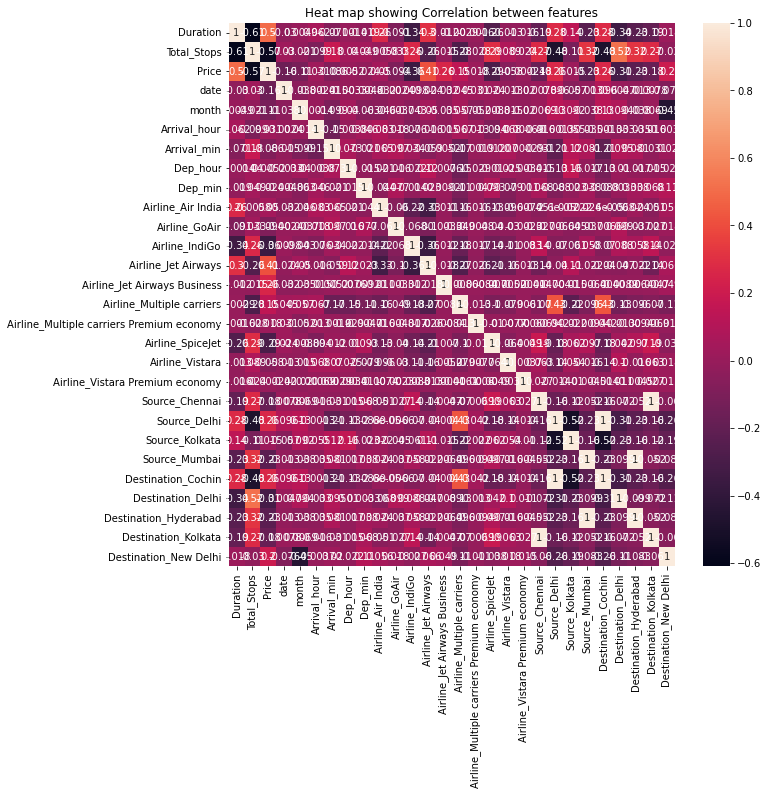

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.title("Heat map showing Correlation between features")
plt.show()

In [ ]:
train.corr()['Price'].sort_values(ascending = False )[1:]

Duration                                     0.501645
Airline_Jet Airways                          0.411441
Destination_Cochin                           0.261426
Source_Delhi                                 0.261426
Airline_Jet Airways Business                 0.255530
Destination_New Delhi                        0.199419
Airline_Multiple carriers                    0.145740
Airline_Air India                            0.050271
Arrival_hour                                 0.031043
Airline_Multiple carriers Premium economy    0.018245
Source_Kolkata                               0.015443
Dep_hour                                     0.005174
Airline_Vistara Premium economy             -0.000236
Dep_min                                     -0.024189
Airline_Vistara                             -0.057972
Arrival_min                                 -0.086164
Airline_GoAir                               -0.094088
month                                       -0.113403
date                        

There is a high correlation between:

Price & Total Stops
Price & flight duration
Duration & Total stops 

In [ ]:
from sklearn.feature_selection import chi2
values=chi2(train,train['Price'])
values

(array([3.23390086e+06, 2.34085663e+04, 2.47883045e+07, 2.20384449e+04,
        2.37987826e+03, 1.85224934e+04, 4.98594749e+04, 1.06350273e+04,
        6.68907173e+04, 8.50913927e+03, 9.18170973e+03, 7.69736987e+03,
        6.66969793e+03, 1.04570000e+04, 9.07291430e+03, 1.04500000e+04,
        8.48159114e+03, 9.85039138e+03, 1.04600000e+04, 9.86256086e+03,
        5.99166076e+03, 7.43319410e+03, 9.56602153e+03, 5.99166076e+03,
        8.78963362e+03, 9.56602153e+03, 9.86256086e+03, 8.88166167e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.41162419e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [ ]:
values1=pd.DataFrame({'features':train.columns,'fscore':values[0],'pvalues':values[1]})
values1

,features,fscore,pvalues
0,Duration,3.233901e+06,0.000000e+00
1,Total_Stops,2.340857e+04,0.000000e+00
2,Price,2.478830e+07,0.000000e+00
3,date,2.203844e+04,0.000000e+00
4,month,2.379878e+03,6.411624e-15
5,Arrival_hour,1.852249e+04,0.000000e+00
6,Arrival_min,4.985947e+04,0.000000e+00
7,Dep_hour,1.063503e+04,0.000000e+00
8,Dep_min,6.689072e+04,0.000000e+00
9,Airline_Air India,8.509139e+03,0.000000e+00


In [ ]:
values1.sort_values(by='pvalues',ascending=True)

,features,fscore,pvalues
0,Duration,3.233901e+06,0.000000e+00
25,Destination_Hyderabad,9.566022e+03,0.000000e+00
24,Destination_Delhi,8.789634e+03,0.000000e+00
23,Destination_Cochin,5.991661e+03,0.000000e+00
22,Source_Mumbai,9.566022e+03,0.000000e+00
21,Source_Kolkata,7.433194e+03,0.000000e+00
20,Source_Delhi,5.991661e+03,0.000000e+00
19,Source_Chennai,9.862561e+03,0.000000e+00
18,Airline_Vistara Premium economy,1.046000e+04,0.000000e+00
17,Airline_Vistara,9.850391e+03,0.000000e+00


#Machine Learning Models

For predicting the Price, 6 models are bult using the following algorithms:

Multiple Linear Regression

K neighnors regressor

Support Vector Regressor

Decision Tree regressor

Random Forest Regressor

Gradient Boosting Regressor

Compare the accuracies got from these 8 models and select the best model. Apply hyperparameter tuning to increase its efficiency.


#x, y Split

In [ ]:
# dropping price columns
x= train.drop('Price',axis=1) 
x

,Duration,Total_Stops,date,month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,4,24,3,1,10,22,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,1,1,5,13,15,5,50,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,1,9,6,4,25,9,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,325,0,12,5,23,30,18,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4,285,0,1,3,21,35,16,50,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4,9,4,22,25,19,55,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,155,4,27,4,23,20,20,45,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,180,4,27,4,11,20,8,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,4,1,3,14,10,11,30,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y =train['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10463, dtype: int64

In [ ]:
#train test split with 30% test values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
x_train.shape , x_test.shape 

((7324, 27), (3139, 27))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

#Modelling

Importing Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
modelLR  = LinearRegression()
modelRFR = RandomForestRegressor(n_estimators = 100,random_state = 42)
modelDTR = DecisionTreeRegressor(random_state = 42)
modelGBR = GradientBoostingRegressor()
modelSVR = SVR(kernel = 'rbf')
modelKNR = KNeighborsRegressor()

In [ ]:
modelLR.fit(x_train, y_train)
modelRFR.fit(x_train, y_train)
modelDTR.fit(x_train, y_train)
modelGBR.fit(x_train, y_train)
modelSVR.fit(x_train, y_train)
modelKNR.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
modelLRy_pred  = modelLR.predict(x_test)
modelRFRy_pred = modelRFR.predict(x_test)
modelDTRy_pred = modelDTR.predict(x_test)
modelSVRy_pred = modelSVR.predict(x_test)
modelKNRy_pred = modelKNR.predict(x_test)
modelGBRy_pred = modelGBR.predict(x_test)

#Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

def model_feature(model):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:',r2_score(y_test , y_pred))
    print('MAE',mean_absolute_error(y_test , y_pred))
    print('MAPE',mean_absolute_percentage_error(y_test , y_pred)) 
    print('MSE' ,mean_squared_error(y_test , y_pred)) 

In [ ]:
model_feature(LinearRegression()) 

LinearRegression Model
r2_score: 0.5680339172600783
MAE 2057.451845835194
MAPE 0.2547206276551702
MSE 8754589.39500441


In [ ]:
model_feature(DecisionTreeRegressor()) 

DecisionTreeRegressor Model
r2_score: 0.6709773183783548
MAE 1416.2370181586493
MAPE 0.15700117576207148
MSE 6668251.500141587


In [ ]:
model_feature(RandomForestRegressor()) 

RandomForestRegressor Model
r2_score: 0.8124344650458483
MAE 1192.8468292715302
MAPE 0.1347654007008216
MSE 3801361.5160767105


In [ ]:
model_feature(KNeighborsRegressor())

KNeighborsRegressor Model
r2_score: 0.7385535751261567
MAE 1453.1750876075182
MAPE 0.16288013872286658
MSE 5298694.017929277


In [ ]:
model_feature(GradientBoostingRegressor()) 

GradientBoostingRegressor Model
r2_score: 0.7613411198666716
MAE 1530.9200508979047
MAPE 0.18112533337319398
MSE 4836862.393885746


In [ ]:
model_feature(SVR()) 

SVR Model
r2_score: 0.05769483353249427
MAE 3362.951907599095
MAPE 0.46289153639502545
MSE 19097552.20800785


In [ ]:
model_list = [LinearRegression(), KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor() , GradientBoostingRegressor() , SVR()]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [ ]:
dic= {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dic).sort_values(ascending = False , by = 'R2_score',ignore_index=True)
model_df 

,Model,R2_score,MAPE,MAE,MSE
0,RandomForestRegressor,0.81,0.13,1195.46,3780570.98
1,GradientBoostingRegressor,0.76,0.18,1530.82,4836630.17
2,KNeighborsRegressor,0.74,0.16,1453.18,5298694.02
3,DecisionTreeRegressor,0.67,0.16,1402.09,6591332.94
4,LinearRegression,0.57,0.25,2057.45,8754589.40
5,SVR,0.06,0.46,3362.95,19097552.21


Best R2_score is for RandomForestRegressor

#Hyperparameter Tuning

Hyperparameter Tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins.

2 common methods are:

Grid Search: try every combination of a preset list of values of the hyper-parameters and evaluate the model for each combination.--> search whole parameter for the best params Choose following method for hyperparameter tuning

Random search: random combinations of the hyperparameters are used to find the best solution for the built model.
RandomizedSearchCV----->fast

In some cases, a model tuned with randomized search is more accurate than a model tuned with grid search in the long run.

Fit the model and Check best paramters and best score


The Random Forest Regressor model turned out to be the most accurate one out of the 6 models.

#Tuning the best model : RandomForestRegressor

In [ ]:
reg=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[100,250,1200]
max_depth=[5,15,25,30]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
criterion=['squared_error','absolute_error']

random_grid={'n_estimators':n_estimators,'max_depth':max_depth,
    'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}

In [ ]:
RFR_random=RandomizedSearchCV(reg,random_grid,scoring='neg_mean_squared_error',cv=5,random_state=42)
RFR_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 250, 1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
RFR_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'squared_error'}

In [ ]:
y_pred=RFR_random.predict(x_test)


In [ ]:
df1=pd.DataFrame({'Actual values':y_test,'Predicted value':y_pred})
df1

,Actual values,Predicted value
7659,15894,13636.339498
8235,8366,12086.868112
3585,3943,4051.415948
7625,8085,8669.674235
4812,4049,6602.737736
...,...,...
5400,6412,6391.178633
4601,5069,5170.509965
6151,12121,12045.899246
1956,14887,13415.608552


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('error:',mean_absolute_error(y_test,y_pred))
print('error percentage:',mean_absolute_percentage_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
print('mse:',mse)
print('rmse:',np.sqrt(mse))
print('r2_score:',r2_score(y_test,y_pred))

error: 1144.2543554619524
error percentage: 0.13075071885418063
mse: 3304087.013707651
rmse: 1817.714777875685
r2_score: 0.8369708206809143


For Random Forest Regressor,

Before hyper tuning, R2 score = 81 %
After hyper tuning, R2 score = 83 %



Conclusion:

So, we have used a random forest model for this data and improved accuracy by doing hyperparameter tuning.
As a result, we were able to successfully train our regression model, the ‘Random forest model,’ to forecast fares of flight tickets with an R2 score of 83 percent.



#Final Predictions On The Test Dataset



In [ ]:
#from sklearn.metrics import r2_score
X_test= test
y_pred_test = RFR_random.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
submission= pd.DataFrame({'Airline':test_df['Airline'],'Route':test_df['Route'],'Flight_Price':y_pred_test})
submission

,Airline,Route,Flight_Price
0,Jet Airways,DEL → BOM → COK,13586.738996
1,IndiGo,CCU → MAA → BLR,6795.922450
2,Jet Airways,DEL → BOM → COK,12937.864216
3,Multiple carriers,DEL → BOM → COK,8313.292155
4,Air Asia,BLR → DEL,8569.508455
...,...,...,...
2666,Air India,CCU → DEL → BLR,13005.342935
2667,IndiGo,CCU → BLR,6795.922450
2668,Jet Airways,DEL → BOM → COK,13586.738996
2669,Air India,DEL → BOM → COK,12270.521423


In [ ]:
#Save results
submission.to_csv("submission.csv",index=False)